[Source](https://docs.opencv.org/4.5.2/d3/db4/tutorial_py_watershed.html)

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [18]:
img = cv.imread('water_coins.jpg')

imgc = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV)

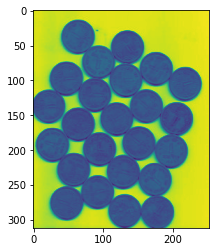

<function destroyAllWindows>

In [20]:
plt.figure("Original")
plt.imshow(imgc)

plt.imshow(imgg)

plt.show()

cv.waitKey(0)
cv.destroyAllWindows

## The problem with basic thresholding and contour extraction
[Source](https://www.pyimagesearch.com/2015/11/02/watershed-opencv/)

In [24]:
# import the necessary packages
from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import argparse
import imutils
import cv2

In [28]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2